In [159]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.metrics import confusion_matrix
import scipy.linalg as la
import sklearn.datasets as ds

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer, load_iris, make_moons
from sklearn.model_selection import train_test_split

dict_keys(['Xtest', 'trueClassTest', 'Xtrain', 'trueClassTrain'])


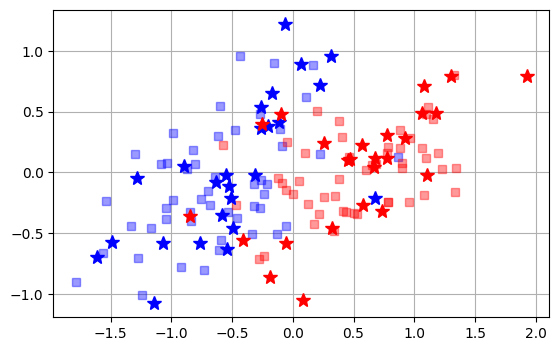

In [160]:
D=pickle.load(open('binClassData.p', 'rb'))
print(D.keys())
X1 = D['Xtrain']
y1 = D['trueClassTrain']
X2 = D['Xtest']
y2 = D['trueClassTest']

plt.plot(X1[0, y1==0], X1[1, y1==0], 'sb', X1[0, y1==1], X1[1, y1==1], 'sr', alpha=.4)
plt.plot(X2[0, y2==0], X2[1, y2==0], '*b', X2[0, y2==1], X2[1, y2==1], '*r', ms=10)
plt.axis('scaled')
plt.grid(True)

# Discriminantes Logísticos

In [161]:
"""
l1 -> lasso          l2 -> ridge
"""

dl=LogisticRegression(penalty='l2', C=0.1, random_state=42, solver='saga').fit(X1.T,y1)
#dl=LogisticRegression(penalty='none', C=0.1, random_state=42, solver='saga').fit(X1.T,y1)
print('Train Score:', dl.score(X1.T,y1))
print('Test Score:', dl.score(X2.T,y2))

Train Score: 0.87
Test Score: 0.82


w0 [0.0583961]
w [ 1.28535287 -0.03823838]
x1 [-2  2]
x2 [-65.70125064  68.75556908]


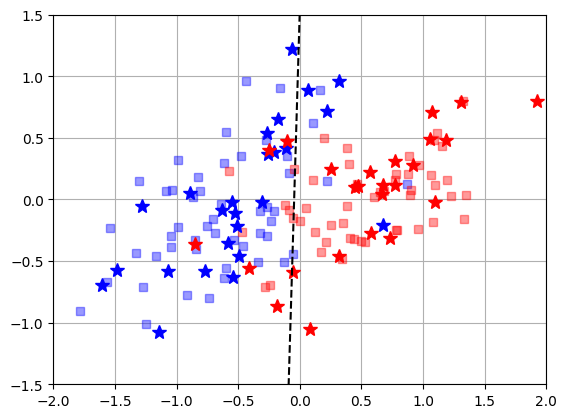

In [162]:
w = dl.coef_
w = w.squeeze()
w0 = dl.intercept_
print('w0', w0)
print('w', w)

x1 = np.array([-2,2])
x2 = -1/w[1]*(w0+w[0]*x1)
print('x1', x1)
print('x2', x2)

plt.plot(X1[0, y1==0], X1[1, y1==0], 'sb', X1[0, y1==1], X1[1, y1==1], 'sr', alpha=.4)
plt.plot(X2[0, y2==0], X2[1, y2==0], '*b', X2[0, y2==1], X2[1, y2==1], '*r', ms=10)
plt.plot(x1, x2, '--k')
plt.axis('scaled')
plt.axis([-2, 2, -1.5, 1.5])
plt.grid(True)

In [163]:
D=load_breast_cancer()
X = D.data
y = D.target
fN = D.feature_names
print(D.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [164]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=1/3)
dl=LogisticRegression(penalty='l1', C=0.1, random_state=42, solver='saga', max_iter=5000).fit(X1,y1)
print('Train Score:', dl.score(X1,y1))
print('Test Score:', dl.score(X2,y2))

Train Score: 0.9261213720316622
Test Score: 0.9263157894736842


[ 0.01031581  0.00623275  0.06327944  0.01581532  0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.02004605  0.          0.          0.          0.
  0.          0.          0.01098358  0.00673658  0.05613286 -0.0263698
  0.          0.          0.          0.          0.          0.        ]


21

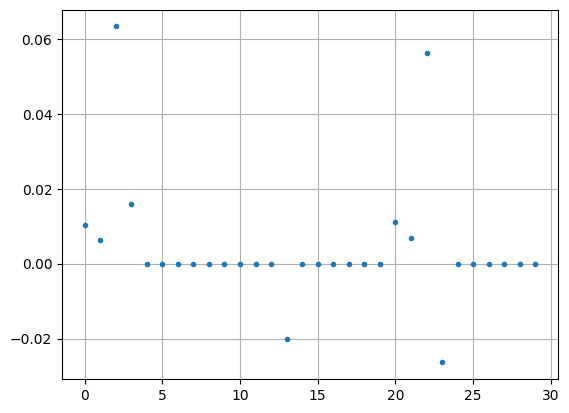

In [165]:
w = dl.coef_
w = w.squeeze()
print(w)
plt.plot(w, '.')
plt.grid(True)
np.sum(w==0)

In [166]:
print(fN[w!=0])
print(np.argwhere(w!=0).squeeze())

['mean radius' 'mean texture' 'mean perimeter' 'mean area' 'area error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area']
[ 0  1  2  3 13 20 21 22 23]


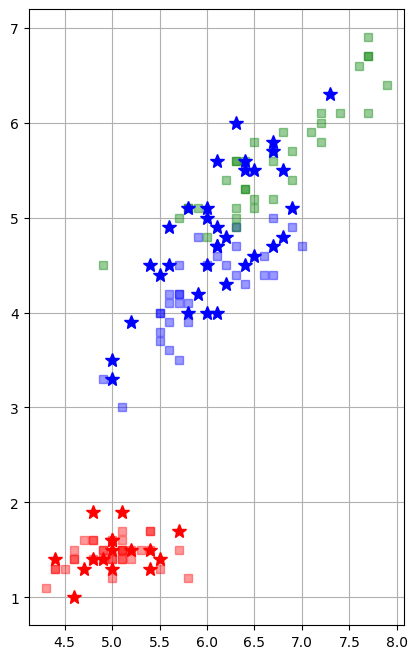

In [167]:
D=load_iris()
X = D.data
y = D.target

X1,X2,y1,y2 = train_test_split(X, y, test_size=1/3, shuffle=True, random_state=0)

plt.figure(figsize=(5,8))
plt.plot(X1[y1==0, 0], X1[y1==0, 2], 'sr', X1[y1==1, 0], X1[y1==1, 2], 'sb', X1[y1==2, 0], X1[y1==2, 2], 'sg', alpha=.4)
plt.plot(X2[y2==0, 0], X2[y2==0, 2], '*r', X2[y2==1, 0], X2[y2==1, 2], '*b', X2[y2==2, 0], X2[y2==2, 2], '*b', ms=10)
plt.axis('scaled')
plt.grid(True)

In [168]:
dl=LogisticRegression(solver='liblinear',C=0.1,penalty='l1').fit(X1, y1)
y2e = dl.predict(X2)
print('Número de erros (teste):', np.sum(y2!=y2e))
print('---------')
print(dl.coef_)

Número de erros (teste): 19
---------
[[ 0.00000000e+00  8.78387539e-01 -1.09201647e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.52413649e-01  1.02402607e-03  0.00000000e+00]
 [-7.29617693e-01  0.00000000e+00  9.64444475e-01  0.00000000e+00]]


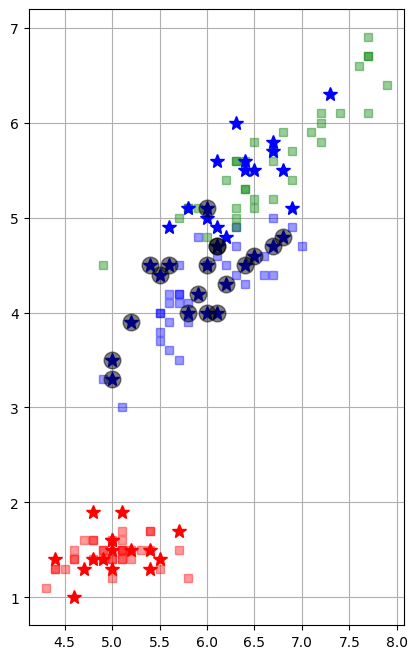

In [169]:
plt.figure(figsize=(5,8))
plt.plot(X1[y1==0, 0], X1[y1==0, 2], 'sr', X1[y1==1, 0], X1[y1==1, 2], 'sb', X1[y1==2, 0], X1[y1==2, 2], 'sg', alpha=.4)
plt.plot(X2[y2==0, 0], X2[y2==0, 2], '*r', X2[y2==1, 0], X2[y2==1, 2], '*b', X2[y2==2, 0], X2[y2==2, 2], '*b', ms=10)
plt.plot(X2[y2!=y2e, 0], X2[y2 != y2e, 2], 'ok', alpha=.5, ms=12)
plt.axis('scaled')
plt.grid(True)

In [170]:
dl=LogisticRegression(solver='saga',C=0.1,penalty='l1',multi_class='ovr', max_iter=1000).fit(X1, y1)
#dl=LogisticRegression(solver='saga',C=0.1,penalty='l1',multi_class='multinomial', max_iter=1000).fit(X1, y1)
y2e = dl.predict(X2)
print('Número de erros (teste):', np.sum(y2!=y2e))
print('---------')
print(dl.coef_)

Número de erros (teste): 12
---------
[[ 0.          0.         -1.58247548  0.        ]
 [ 0.          0.          0.05872469  0.        ]
 [ 0.          0.          1.37137985  0.        ]]


# Máquinhas de Suporte vetorial

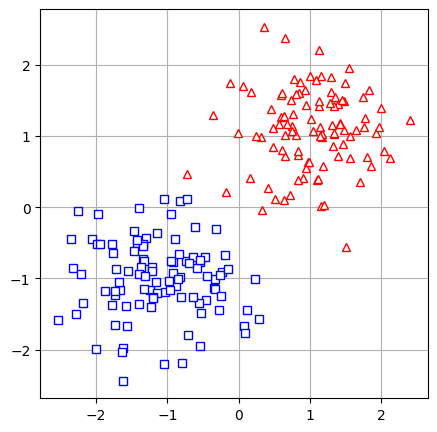

In [171]:
from sklearn.svm import LinearSVC, SVC

Nc = 100
x1 = np.random.randn(2, Nc)*.6-1
x2 = np.random.randn(2, Nc)*.6+1
y = np.hstack((np.zeros(Nc), np.ones(Nc)))
X = np.hstack((x1,x2))

plt.figure(figsize=(5, 7))
plt.plot(x1[0,:], x1[1,:], 'sb', mfc='w')
plt.plot(x2[0,:], x2[1,:], '^r', mfc='w')
plt.axis('scaled')
plt.grid(True)

Nº de erros: 0 1


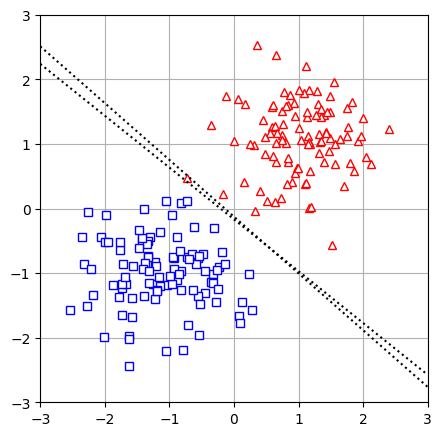

In [172]:
svm1=LinearSVC(dual=False, C=1).fit(X.T,y)
svm2=SVC(kernel='linear', C=1).fit(X.T,y)

y1 = svm1.predict(X.T)
y2 = svm2.predict(X.T)
print('Nº de erros:', np.sum(y!=y1), np.sum(y!=y2))

w1 = svm1.coef_.squeeze()
w2 = svm2.coef_.squeeze()
w0a = svm1.intercept_
w0b = svm2.intercept_

gx = np.array([-3, 3])
gy1 = -1/w1[1]*(w0a+w1[0]*gx)
gy2 = -1/w2[1]*(w0b+w2[0]*gx)

plt.figure(figsize=(5, 7))
plt.plot(x1[0,:], x1[1,:], 'sb', mfc='w')
plt.plot(x2[0,:], x2[1,:], '^r', mfc='w')
plt.plot(X[0, y!=y1], X[1, y!=y1], 'ok', ms=3)
plt.plot(gx, gy1, ':k')
plt.plot(gx, gy2, ':k')
plt.axis('scaled')
plt.axis([-3, 3, -3, 3])
plt.grid(True)

Nº de erros: 1


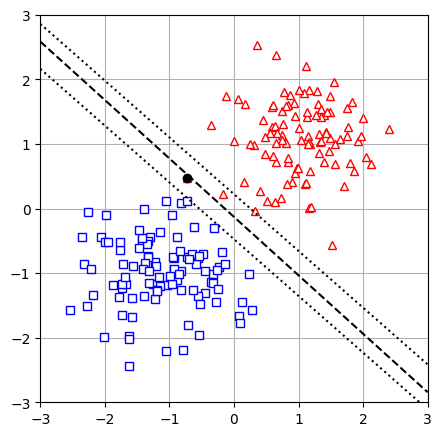

In [173]:
#svm1=LinearSVC(dual=False, C=0.1).fit(X.T,y)
svm1=SVC(kernel='linear', C=1).fit(X.T,y)

ye = svm1.predict(X.T)
print('Nº de erros:', np.sum(y!=ye))

w = svm1.coef_.squeeze()
w0 = svm1.intercept_

gx = np.array([-3, 3])
gy = -1/w1[1]*(w0+w[0]*gx)

mg = 1/np.sqrt(np.sum(w**2))
gy1 = -1/w[1]*(w[0]*gx+w0-mg)
gy2 = -1/w[1]*(w[0]*gx+w0+mg)

plt.figure(figsize=(5, 7))
plt.plot(x1[0,:], x1[1,:], 'sb', mfc='w')
plt.plot(x2[0,:], x2[1,:], '^r', mfc='w')
plt.plot(X[0, y!=ye], X[1, y!=ye], 'ok')
plt.plot(gx, gy, '--k')
plt.plot(gx, gy1, ':k')
plt.plot(gx, gy2, ':k')
plt.axis('scaled')
plt.axis([-3, 3, -3, 3])
plt.grid(True)

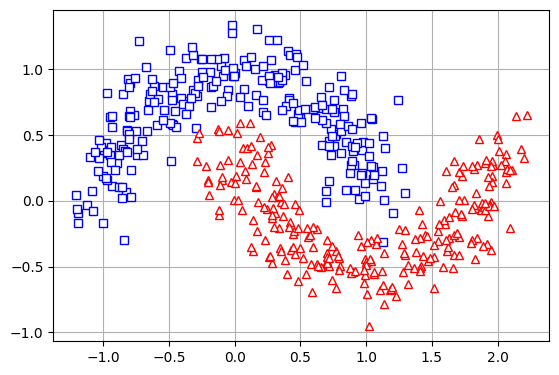

In [174]:
X, y = make_moons(n_samples=500, noise=0.15, random_state=0)

plt.plot(X[y==0, 0], X[y==0, 1], 'sb', mfc='w')
plt.plot(X[y==1, 0], X[y==1, 1], '^r', mfc='w')
plt.axis('scaled')
plt.grid(True)

Nº de erros 5


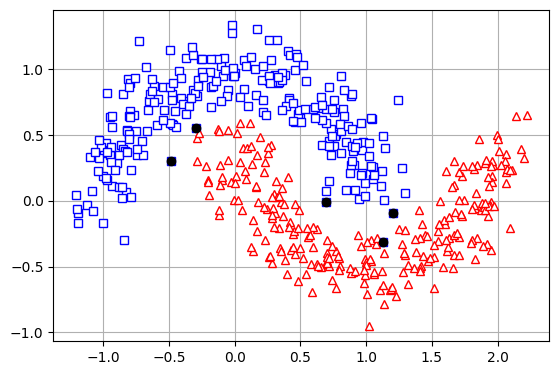

In [175]:
svm = SVC(kernel='poly', degree=3, C=10, coef0=1, gamma='auto').fit(X,y)
ye = svm.predict(X)
plt.plot(X[y==0, 0], X[y==0, 1], 'sb', mfc='w')
plt.plot(X[y==1, 0], X[y==1, 1], '^r', mfc='w')
plt.plot(X[y!=ye, 0], X[y!=ye, 1], 'ok')
print('Nº de erros', np.sum(y!=ye))
plt.axis('scaled')
plt.grid(True)

In [176]:
vs = svm.support_vectors_
vs.shape

(46, 2)

Nº de vetores de suporte: 5
Nº de erros 15


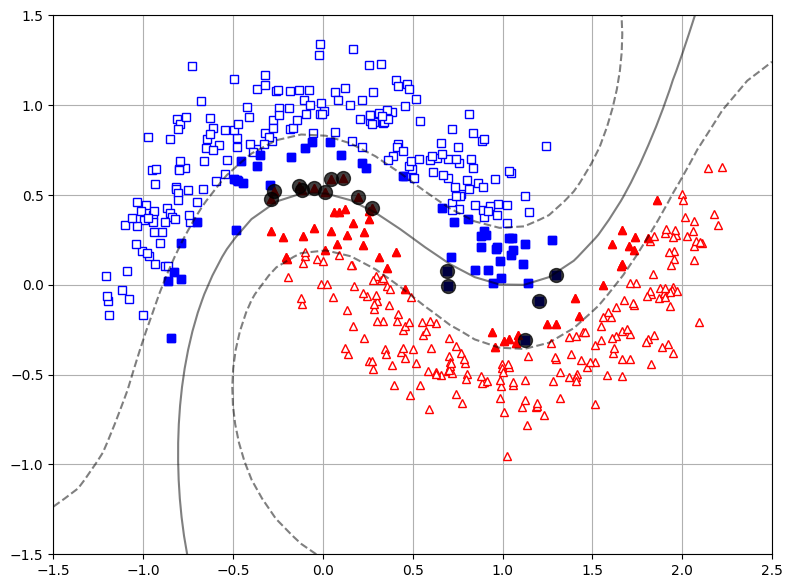

In [184]:
#svm = SVC(kernel='poly', degree=5, C=1, coef0=1, gamma='auto').fit(X,y)
svm = SVC(kernel='rbf', C=1, gamma='auto').fit(X,y)
#svm = SVC(kernel='sigmoid', C=1, gamma=3, coef0=-3).fit(X,y)
ye = svm.predict(X)

xx = np.linspace(-1.5, 2.5, 30)
yy = np.linspace(-1.5, 1.5, 30)

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

plt.figure(figsize=(10,7))
plt.plot(X[y==0, 0], X[y==0, 1], 'sb', mfc='w')
plt.plot(X[y==1, 0], X[y==1, 1], '^r', mfc='w')

vs = svm.support_vectors_
idx = svm.support_
print('Nº de vetores de suporte:', idx[0])
plt.plot(vs[y[idx]==0, 0], vs[y[idx]==0, 1], 'sb')
plt.plot(vs[y[idx]==1, 0], vs[y[idx]==1, 1], '^r')

plt.plot(X[y!=ye, 0], X[y!=ye, 1], 'ok', ms=10, alpha=.75)
print('Nº de erros', np.sum(y!=ye))

#Curva de contornos
ax = plt.gca()
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.axis('scaled')
plt.grid(True)

In [189]:
from sklearn.preprocessing import StandardScaler
D = load_breast_cancer()
X = D.data
y = D.target

X1, X2, y1, y2 = train_test_split(X, y, test_size=1/2, stratify=y)

sc = StandardScaler().fit(X1)
X1n = sc.transform(X1)
X2n = sc.transform(X2)

svm = SVC(kernel='rbf', gamma='auto').fit(X1n, y1)

print('% de acertos no treino:', svm.score(X1n, y1))
print('% de acertos no teste:', svm.score(X2n, y2))

% de acertos no treino: 0.9894366197183099
% de acertos no teste: 0.968421052631579


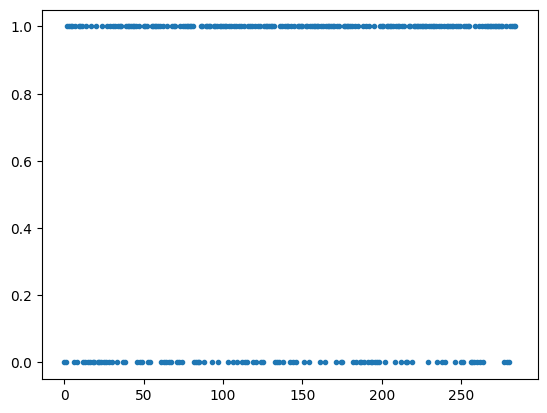

In [190]:
plt.plot(svm.predict(X2n), '.')

In [219]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV

D = load_breast_cancer()
X = D.data
y = D.target

X1,X2,y1,y2=train_test_split(X, y, test_size=1/3, stratify=y)

sc=StandardScaler().fit(X1)
X1n=sc.transform(X1)
X2n=sc.transform(X2)

X1na,X2na,y1a,y2a=train_test_split(X1n, y1, test_size=1/2, stratify=y1)

scoreTop=0
gList=[0.0001,0.001,0.01,0.1,1]
cList =[0.1, 1, 10, 50, 100, 150, 200]

for C in cList:
    for g in gList:
        svm=SVC(kernel='rbf',gamma=g,C=C).fit(X1na,y1a)
        score=svm.score(X2na, y2a)
        if score>=scoreTop:
            scoreTop=score
            param=(g,C)
            
svm = SVC(kernel='rbf', gamma=param[0], C = param[1]).fit(X1n, y1)
print('% de acertos no treino:', svm.score(X1n, y1))
print('% acertos na validação:', scoreTop)
print('% de acertos no teste:', svm.score(X2n, y2))
print('Parâmetros: gamma=%.4f, C=%.1f:'%(param[0], param[1]))

% de acertos no treino: 0.9894459102902374
% acertos na validação: 0.968421052631579
% de acertos no teste: 0.9842105263157894
Parâmetros: gamma=0.0100, C=100.0:


In [218]:
D = load_breast_cancer()
X = D.data
y = D.target

X1,X2,y1,y2=train_test_split(X, y, test_size=1/4, stratify=y)

sc=StandardScaler().fit(X1)
X1n=sc.transform(X1)
X2n=sc.transform(X2)

scoreTop=0
gList=[0.0001,0.001,0.01,0.1,1]
cList =[0.1, 1, 10, 50, 100, 150, 200]

for C in cList:
    for g in gList:
        svm=SVC(kernel='rbf',gamma=g,C=C)
        score=cross_val_score(svm, X1n, y1, cv=5)
        if np.mean(score)>=scoreTop:
            scoreTop=np.mean(score)
            param=(g,C)
            
svm = SVC(kernel='rbf', gamma=param[0], C = param[1]).fit(X1n, y1)
print('% de acertos no treino:', svm.score(X1n, y1))
print('% acertos na validação:', scoreTop)
print('% de acertos no teste:', svm.score(X2n, y2))
print('Parâmetros: gamma=%.4f, C=%.1f:'%(param[0], param[1]))

% de acertos no treino: 0.9882629107981221
% acertos na validação: 0.9788508891928865
% de acertos no teste: 0.9790209790209791
Parâmetros: gamma=0.0010, C=100.0:


In [222]:
D = load_breast_cancer()
X = D.data
y = D.target

X1,X2,y1,y2=train_test_split(X, y, test_size=1/4, stratify=y)

sc=StandardScaler().fit(X1)
X1n=sc.transform(X1)
X2n=sc.transform(X2)

gList=[0.0001,0.001,0.01,0.1,1]
cList =[0.1, 1, 10, 50, 100, 150, 200]

grelha={'gamma':gList, 'C':cList}

gSearch = GridSearchCV(SVC(kernel='rbf'), param_grid=grelha, cv=5)
gSearch.fit(X1n, y1)
            
svm = gSearch.best_estimator_
param = gSearch.best_params_

print('% de acertos no treino:', svm.score(X1n, y1))
print('% de acertos no teste:', svm.score(X2n, y2))
print('Parâmetros: gamma=%.4f, C=%.1f:'%(param['gamma'], param['C']))

% de acertos no treino: 0.9859154929577465
% de acertos no teste: 0.958041958041958
Parâmetros: gamma=0.0001, C=200.0:


In [223]:
D = load_breast_cancer()
X = D.data
y = D.target

sc=StandardScaler().fit(X)
Xn=sc.transform(X)

gList=[0.0001,0.001,0.01,0.1,1]
cList =[0.1, 1, 10, 50, 100, 150, 200]

grelha={'gamma':gList, 'C':cList}

scores = cross_val_score(GridSearchCV(SVC(kernel='rbf'), param_grid=grelha, cv=5), Xn, y, cv=5)

print(scores)
print(np.mean(scores))

[0.97368421 0.97368421 0.98245614 0.96491228 0.99115044]
0.9771774569166277
